<a href="https://colab.research.google.com/github/TTomasz90/Spam-Filter-Naive-Bayes/blob/master/Spam_Filter_(Naive_Bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# main imports
from google.colab import files
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

# helper libraries
import copy 
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix


##UPLOAD DATA FILE
I changed the encoding of the original dataset from Latin-1 to Utf-8 because python uses it as a default encoding to avoid any unforeseen errors. Download the modified dataset bellow.

Link to data https://drive.google.com/open?id=13Rqh3Rt1O33UCb_yB6Hv9J28LBZx7GwZ

uploaad the file bellow.




In [3]:
# upload data file
uploaded = files.upload()

Saving spam-utf-8.csv to spam-utf-8.csv


## FORMAT DATA





In [4]:


# referance uploaded data
data = pd.read_csv(io.BytesIO(uploaded['spam-utf-8.csv']))

# clean up data drop unused columns
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

# rename column labels
data = data.rename(columns={"v1":'tag', "v2":'message'})

#Save dataset of SPAM and HAM 
dataSet = copy.copy(data)

#sava dataset of HAM only
hamSet = copy.copy(data[data.tag != 'spam'])

# extract only sms messages
hamSet.drop(['tag'], axis=1, inplace=True)

# view data
dataSet.head(5)


,tag,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# view no spam data set 
hamSet.head(5)

,message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
6,Even my brother is not like to speak with me. ...


## FUNCTION DICTIONARY CREATION

This snippet creates a list of 1000 most common words in our entire dataset. This number is adjustable we can alter it by changing the input to the most_common() method. This function returns a list which we use to express our messages in terms of word counts in our generated dictionary.




In [0]:

# create a dictionary of most common words from the messages in no spam dataset.

def create_dictionary(data):
  
  # dictionary made from all message words
  dictionary = []
  
  #iterate over data
  for index, row in data.iterrows():
    
    # split message into a list of words
    message = (row['message']).split(" ")
    
    # iterate over words and add to dictionary if alphanumeric
    for word in message:
      
      if word.isalpha():
      
        dictionary.append(word)
      
  #get a list of 1000 most occuring words
  dictionary = (Counter(dictionary)).most_common(1000)
  
  return dictionary
  


## FUNCTION FOR GENERATING LABELS AND FEATURES
The prepare_dataset function iterates over all messages in our dataset and expresses them in terms of our dictionary that we created above. Those word count matrices are then added to our featureList . The function also creates a list of labels corresponding to each message. Both the featureList and the labels are the product of this function.



In [0]:
## transform dataSet in terms of messages represented in terms of word counts 
## contained in our dictionary of 1000 most common dataset words.

def prepare_dataSet(dataSet,dictionary):
  
  print("processing...")
  
  featureList = []
  
  labels = []

  for index, row in dataSet.iterrows():
    
    ## dictionary representation of the message
    vector = []
    
    message, tag = row["message"], row['tag']
    
    messageWords = message.split(" ")
    
    ## itterate over all keys in our dictionary 
    
    for key in dictionary:
      
      dictionaryWord = key[0]
   
      vector.append(messageWords.count(dictionaryWord))
   
    featureList.append(vector)
    
    ## append coresponding tag to our labels list
    
    if tag == "spam":
 
      labels.append(1)
    else:
 
      labels.append(0)
 
  print("done")
  
  return featureList, labels
  
  

## GENERATE DICTIONARY, LABELS AND FEATURES

In [0]:
## Generate dictionary

dictionary = create_dictionary(dataSet)

## Generate labels and features

features , labels = prepare_dataSet(dataSet,dictionary)


processing...
done


## TRAIN MODEL
This snippet represents list of features (our dictionary encoded messages) and labels being spit into test and train data. We also define our Naïve Bayes model and then preceded to train it on our preprocessed data.

In [1]:
## split training and test data

x_train, x_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    random_state=30,
                                                    test_size=0.1)

## set model to Naive Bayes from sklearn

model = MultinomialNB()

## supply training data

model.fit(x_train, y_train)


NameError: ignored

## EVALUATION



              precision    recall  f1-score   support

Not Spam "0"       0.99      0.99      0.99       497
    Spam "1"       0.89      0.89      0.89        61

    accuracy                           0.97       558
   macro avg       0.94      0.94      0.94       558
weighted avg       0.97      0.97      0.97       558



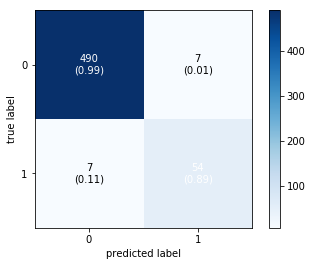

In [0]:


# get list of predictions from test messages
allPredictions = model.predict(x_test)

# labels for binary output.
targetNames = ['Not Spam "0"', 'Spam "1"']

# classification report
print(classification_report(y_test,allPredictions,target_names=targetNames))

# get confusion Matrix
confusionMatrix = confusion_matrix(y_test,allPredictions)

# display confusion Matrix
binary = np.array(confusionMatrix)

labels = ['NOT SPAM', 'SPAM']

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,)

plt.show()


## TEST CUSTOM PREDICTIONS

Function tests your own messages against the NaiveBayes classifier

examples of messages you can test not in the DataSet.

1) "You won a free t-shirt if you text yes back to 3232 in the next 3 minutes"

2) "Hi mom I will be home for dinner at 8."

3) "You won a free trip to Las Vegas."


Or input your own.

In [0]:
def test_NB_Model(message,dictionary,model):
  
  ## dictionary made from all message words
  vector = []
  
  messageWords = message.split(" ")
  
  ## transform message to vector
  
  for key in dictionary:
      
      dictionaryWord = key[0]
   
      vector.append(messageWords.count(dictionaryWord))
    
    
  ## make prediction based on vector created from message
  
  prediction = model.predict([vector])
  
  ## output prediction
  
  if prediction == [1]:
    print("SPAM")
  else:
    print("NOT SPAM")


## Test classifier on custom messages

messageInput = "Hi mom I'm comeing back home at 8 for dinner. "

messageInput2 = "You won a free t-shirt if you text yes back to 3232 "

test_NB_Model(messageInput, dictionary, model)

test_NB_Model(messageInput2, dictionary, model)

NOT SPAM
SPAM
